<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
web = pd.read_excel('web.xlsx')
#Importation du fichier erp.xlsx
erp = pd.read_excel('erp.xlsx')
#Importation du fichier liaison.xlsx
liaison = pd.read_excel('liaison.xlsx')


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
# Afficher les dimensions du dataset
# Nous utilisons la variable 'erp' que nous avons créée à l'étape 1
print("Le tableau comporte {} observation(s) ou article(s)".format(erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [7]:
#Afficher les 5 premières lignes de la table
erp.head(5)


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [8]:
#Vérifier si il y a des lignes en doublon dans la colonne product_id
erp['product_id'].duplicated().sum()

np.int64(0)

In [9]:
#Afficher les valeurs distinctes de la colonne stock_status
erp['stock_status'].value_counts()
#À quelle(s) autre(s) colonne(s) sont-elles liées ? stock_quantity


,count
stock_status,
instock,733
outofstock,92


In [10]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
erp['stock_status_2'] = erp['stock_quantity'].apply(lambda x: 'instock'if x >0 else 'outofstock')
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock


In [11]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
erp["stock_status"] == erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


In [12]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
erp[erp["stock_status"] != erp["stock_status_2"]]
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [13]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

In [14]:
#Corriger la ou les données incohérentes

#Vérification en utilisant le même code que plus haut pour afficher les problèmes
# Je mets à jour la colonne 'stock_status' avec les valeurs correctes de 'stock_status_2'
erp['stock_status'] = erp['stock_status_2']

nb_erreurs = erp[erp["stock_status"] != erp["stock_status_2"]].shape[0]
print (nb_erreurs)


0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [15]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'articles avec un prix non renseigné:{}".format(erp['price'].isnull().sum()))
#Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne "price"
print("Prix mini:", erp['price'].min())
#Afficher le prix maximum de la colonne "price"
print("Prix maxi:", erp['price'].max())
#Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?) suppression
prix_negatifs = erp[erp['price'] < 0]
print(f"Nombre de prix négatifs: {len(prix_negatifs)}")
display(prix_negatifs)

Nombres d'articles avec un prix non renseigné:0
Prix mini: -20.0
Prix maxi: 225.0
Nombre de prix négatifs: 3


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
151,4233,0,-20.0,0,outofstock,10.33,outofstock
469,5017,0,-8.0,0,outofstock,4.34,outofstock
739,6594,0,-9.1,19,instock,4.61,instock


In [16]:
erp = erp[erp['price'] > 0]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [17]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("Stock mini:", erp['stock_quantity'].min())
#Afficher la quantité maximum de la colonne "stock_quantity"
print("Stock maxi:", erp['stock_quantity'].max())
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?suppression)
stocks_negatifs = erp[erp['stock_quantity'] < 0]
print(f"Nombre de stocks négatifs: {len(stocks_negatifs)}")
display(stocks_negatifs)

Stock mini: -10
Stock maxi: 145
Nombre de stocks négatifs: 2


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
449,4973,0,10.0,-10,outofstock,4.96,outofstock
573,5700,1,44.5,-1,outofstock,22.30,outofstock


In [18]:
erp = erp[erp['stock_quantity'] >= 0]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [19]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
#les produits avec 1 devraient avoir une correspondance dans le fichier web (fiche produit)
erp['onsale_web'].value_counts()

,count
onsale_web,
1,715
0,105


In [20]:
#Quelles sont les colonnes à conserver selon vous?
#toutes

In [21]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
erp = erp.drop(columns=['stock_status_2'])

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [22]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Nombres d'articles avec un prix d'achat non renseigné: {}".format(erp['purchase_price'].isnull().sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Prix d'achat mini:", erp['purchase_price'].min())
#Afficher le prix maximum de la colonne "purchase_price"
print("Prix d'achat maxi:", erp['purchase_price'].max())

Nombres d'articles avec un prix d'achat non renseigné: 0
Prix d'achat mini: 2.74
Prix d'achat maxi: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [23]:
#Dimension du dataset
print(web.shape)
#Nombre d'observations
print("Nombre d'observations:", web.shape[0])
#Nombre de caractéristiques
print("Nombre de caractéristiques:", web.shape[1])
web.head(5)


(1513, 29)
Nombre d'observations: 1513
Nombre de caractéristiques: 29


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,NaN,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,NaN,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,NaN,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,NaN,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,NaN,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [24]:
#Consulter le nombre de colonnes
web.info()
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  product_type           1429 non-null   object        
 13  pos

In [25]:
#Selon vous, quelles sont les colonnes à conserver ?
colonnes_a_conserver = ['sku', 'total_sales', 'product_type', 'post_title', 'post_type']

In [26]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
web = web[colonnes_a_conserver]
web.head()

,sku,total_sales,product_type,post_title,post_type
0,11862,3.0,Vin,Gilles Robin Hermitage Rouge 2012,attachment
1,16057,5.0,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,attachment
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,product
3,16295,14.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,attachment
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,product


In [27]:
#Visualisation des valeurs de la colonne sku
web['sku'].unique()
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?


array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [28]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
web_temp = web.dropna(subset=['sku'])
skus_non_conformes = web_temp[~web_temp['sku'].astype(str).str.isnumeric()]
display(skus_non_conformes)

,sku,total_sales,product_type,post_title,post_type
272,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product
842,bon-cadeau-25-euros,7.0,Autre,Bon cadeau de 25€,attachment
1117,13127-1,4.0,Vin,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,attachment
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,product


In [29]:
#Identifier les lignes sans code article
web_sans_sku = web[web['sku'].isnull()]
web = web[web['post_type'] == 'product']
web_sans_sku.info()
web_sans_sku.head()


<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   product_type  2 non-null      object 
 3   post_title    2 non-null      object 
 4   post_type     2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


,sku,total_sales,product_type,post_title,post_type
8,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN


In [30]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre
#On supprime la ligne spécifique du "bon cadeau"
web = web[web['sku'] != 'bon-cadeau-25-euros']

In [31]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
#On ne garde que les lignes de type 'product'
web = web[web['post_type'] == 'product']
nb_doublons_final = web['sku'].duplicated().sum()
print(f"Nombre de doublons: {nb_doublons_final}")
print(web.shape[0])

Nombre de doublons: 1
715


In [32]:
#Les lignes sans code article semblent être toutes non renseignées
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
web_sans_sku.head()
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
web_sans_sku.info()
#3 - Que constatez-vous? seuls 2 ont des infos.

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   product_type  2 non-null      object 
 3   post_title    2 non-null      object 
 4   post_type     2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 6.0+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [33]:
#Dimension du dataset
print(liaison.shape)
#Nombre d'observations
print("Nombre d'observations:", liaison.shape[0])
#Nombre de caractéristiques
print("Nombre de caractéristiques:", liaison.shape[1])
liaison.head(5)

(825, 2)
Nombre d'observations: 825
Nombre de caractéristiques: 2


,id_web,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039


In [34]:
#Consulter le nombre de colonnes
liaison.info()
#La nature des données dans chacune des colonnes

#Le nombre de valeurs présentes dans chacune des colonnes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [35]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
liaison['product_id'].duplicated().sum()

np.int64(0)

In [36]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
liaison['id_web'].duplicated().sum()

np.int64(90)

In [37]:
#Avons-nous des articles sans correspondance? oui
nb_sans_lien = liaison['id_web'].isnull().sum()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [38]:
#Fusion des fichiers df_erp et df_liaison
df_temp = erp.merge(liaison, on='product_id', how='outer', indicator=True)

print(df_temp['_merge'].value_counts())

_merge
both          820
right_only      5
left_only       0
Name: count, dtype: int64


In [39]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
#non

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [40]:
#Fusionner les datasets df_merge et df_web
web_clean = web[web['post_type'] == 'product'].copy()
web_clean = web_clean.drop_duplicates(subset=['sku'])
df_final = df_temp.merge(web_clean, left_on='id_web', right_on='sku', how='left', indicator='_merge_web')


In [41]:
#Avons-nous des lignes sans correspondance?
print(df_final['_merge_web'].value_counts())

_merge_web
both          804
left_only      21
right_only      0
Name: count, dtype: int64


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

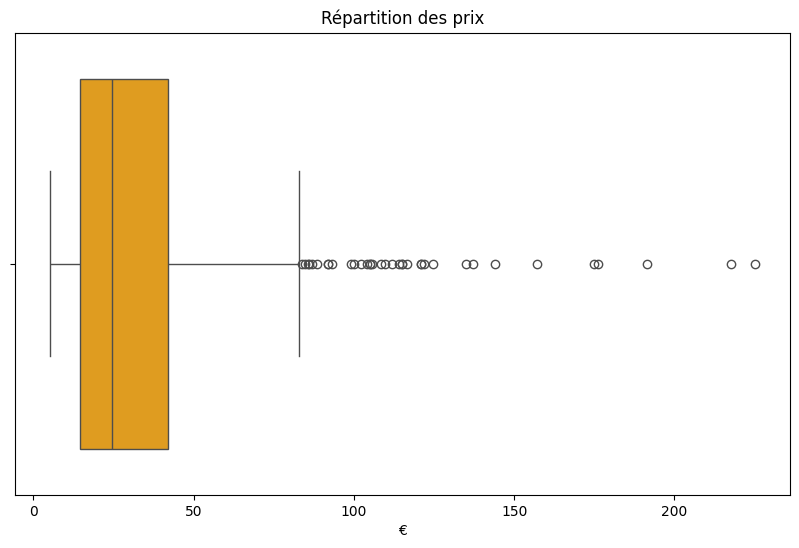

In [42]:
#Création d'une boîte à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_final['price'], color='orange')
plt.title("Répartition des prix")
plt.xlabel("€")
plt.show()


In [43]:
#Autre méthode avec plotly express
fig = px.box(df_final,
             x="price",
             title="Répartition des prix",
             hover_data=['post_title'])

fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [44]:
#Calculer la moyenne du prix
moyenne = df_final['price'].mean()
print(f"prix moyen: {moyenne:.2f} €")

#Calculer l'écart-type du prix
ecart_type = df_final['price'].std()
print(f"Ecart-type: {ecart_type:.2f} €")
#Calculer le Z-score
z_scores = (moyenne) / ecart_type
print(z_scores)

prix moyen: 32.36 €
Ecart-type: 26.64 €
1.2148126959294283


In [45]:
#Quel est le seuil prix dont le z-score est supérieur à 3?
seuil_prix = moyenne + (3 * ecart_type)

print(f"Le seuil de prix pour un Z-score de 3 est : {seuil_prix:.2f} €")

Le seuil de prix pour un Z-score de 3 est : 112.28 €


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [46]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
description = df_final['price'].describe()
print(description)

count    820.000000
mean      32.362744
std       26.640110
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [47]:
#Définir un seuil pour les articles "outliers" en prix
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)
IQR = Q3 - Q1
seuil_iqr = Q3 + (1.5 * IQR)

print(f"Premier Quartile : {Q1} €")
print(f"Troisième Quartile : {Q3} €")
print(f"Intervalle Interquartile : {IQR} €")
print(f"Seuil pour les outliers : {seuil_iqr:.2f} €")

Premier Quartile : 14.6 €
Troisième Quartile : 42.0 €
Intervalle Interquartile : 27.4 €
Seuil pour les outliers : 83.10 €


In [48]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
outliers = df_final[df_final['price'] > seuil_iqr]
nb_outliers = len(outliers)
proportion = (nb_outliers / len(df_final)) * 100

print(f"Nombre d'outliers détectés : {nb_outliers}")
print(f"Proportion par rapport au catalogue : {proportion:.2f} %")

Nombre d'outliers détectés : 36
Proportion par rapport au catalogue : 4.36 %


In [49]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?
display(outliers[['post_title', 'price']].sort_values(by='price', ascending=False).head(10))
# ce sont des champagnes, des cognac ou des vins d'exception. ce ne sont pas des erreurs de saisie.

,post_title,price
208,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
460,David Duband Charmes-Chambertin Grand Cru 2014,217.5
635,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3
227,Cognac Frapin VIP XO,176.0
598,Camille Giroud Clos de Vougeot 2016,175.0
230,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
242,Pierre Jean Villa Condrieu Jardin Suspendu 2018,144.0
411,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0
697,Champagne Gosset Célébris Vintage 2007,135.0
556,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [50]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']
df_final = df_final[df_final['price'] > 0]
df_final = df_final[df_final['total_sales'] > 0]
display(df_final[['post_title', 'price', 'total_sales', 'ca_par_article']].head())
#Calculer la somme de la colonne "ca_par_article"
ca_total = df_final['ca_par_article'].sum()
print(f"Le Chiffre d'Affaires total du site web est de : {ca_total:,.2f} €")
#Ce résultat correspond au chiffre d'affaire du site web
lignes_negatives = df_final[df_final['ca_par_article'] < 0]
display(lignes_negatives[['post_title', 'price', 'total_sales', 'ca_par_article']])


,post_title,price,total_sales,ca_par_article
0,Pierre Jean Villa Saint-Joseph Préface 2018,24.2,6.0,145.2
1,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,34.3,9.0,308.7
3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,14.1,12.0,169.2
4,Pierre Jean Villa Côte Rôtie Carmina 2017,46.0,3.0,138.0
5,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,34.3,7.0,240.1


Le Chiffre d'Affaires total du site web est de : 143,149.10 €


,post_title,price,total_sales,ca_par_article


In [51]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_tri = df_final.sort_values(by='ca_par_article', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_tri = df_tri.reset_index(drop=True)
#Afficher les 20 premiers articles en CA
display(df_tri[['post_title', 'price', 'total_sales', 'ca_par_article']].head(20))

,post_title,price,total_sales,ca_par_article
0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,11.0,2475.0
1,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,6.0,1147.8
2,Champagne Egly-Ouriet Grand Cru Brut Rosé,79.5,14.0,1113.0
3,Agnès Levet Côte Rôtie Améthyste 2017,41.2,20.0,824.0
4,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,7.0,805.0
5,Champagne Agrapart &amp; Fils Minéral Extra Br...,86.8,9.0,781.2
6,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,7.0,735.0
7,Camille Giroud Clos de Vougeot 2016,175.0,4.0,700.0
8,Champagne Gosset Célébris Vintage 2007,135.0,5.0,675.0
9,Champagne Agrapart &amp; Fils L'Avizoise Extra...,112.0,6.0,672.0


In [52]:
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar(df_tri.head(20),
             x='post_title',
             y='ca_par_article',
             title="Top 20 des produits par Chiffre d'Affaires (€)",
             labels={'post_title': 'Nom du produit', 'ca_par_article': "Chiffre d'Affaires (€)"},
             color='ca_par_article')
fig.show()

In [53]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_pareto = df_final.sort_values(by='ca_par_article', ascending=False).copy()
ca_total = df_pareto['ca_par_article'].sum()
df_pareto['part_ca'] = df_pareto['ca_par_article'] / ca_total

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_final = df_final[df_final['price'] > 0]
df_pareto['ca_cumul'] = df_pareto['part_ca'].cumsum()
display(df_pareto[['post_title', 'ca_par_article', 'ca_cumul']].head())
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
articles_top_80 = df_pareto[df_pareto['ca_cumul'] <= 0.8]
nombre_articles_80 = len(articles_top_80)
print(f"\nnombre d'articles représentant 80% du CA : {nombre_articles_80}")
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
nombre_total_articles = len(df_pareto)
proportion = (nombre_articles_80 / nombre_total_articles) * 100
print(f"Il faut {nombre_articles_80} articles pour réaliser 80% du Chiffre d'Affaires.")
print(f"Cela représente {proportion:.2f}% du catalogue.")

,post_title,ca_par_article,ca_cumul
208,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2475.0,0.017290
635,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,1147.8,0.025308
209,Champagne Egly-Ouriet Grand Cru Brut Rosé,1113.0,0.033083
630,Agnès Levet Côte Rôtie Améthyste 2017,824.0,0.038839
708,Domaine des Comtes Lafon Volnay 1er Cru Santen...,805.0,0.044463



nombre d'articles représentant 80% du CA : 432
Il faut 432 articles pour réaliser 80% du Chiffre d'Affaires.
Cela représente 62.88% du catalogue.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

In [54]:
#####################################
# Palmarès des articles en quantité #
#####################################
import plotly.express as px
#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_top_quantite = df_final.sort_values(by='total_sales', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_top_quantite = df_top_quantite.reset_index(drop=True)
#Afficher les 20 premiers articles en quantité
display(df_top_quantite.head(20))
#Graphique en barre des 20 premiers articles avec plotly express
fig = px.bar ( df_top_quantite.head(20),
              x='post_title',
              y='total_sales',
              title="Top 20 des Ventes en volume",
              labels={'post_title': 'Nom', 'total_sales': 'Nombre de Vente'},
              color='total_sales')
fig.show()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,product_type,post_title,post_type,_merge_web,ca_par_article
0,4867,1.0,9.9,121.0,instock,4.86,16148,both,16148,36.0,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,product,both,356.4
1,4203,1.0,9.9,74.0,instock,5.01,15415,both,15415,27.0,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,product,both,267.3
2,4275,1.0,14.9,62.0,instock,7.78,14864,both,14864,24.0,Vin,I Fabbri Chianti Classico Lamole 2017,product,both,357.6
3,4726,1.0,12.7,0.0,outofstock,6.82,14950,both,14950,22.0,Vin,François Baur Pinot Noir Schlittweg 2017,product,both,279.4
4,4647,1.0,28.5,45.0,instock,14.14,16525,both,16525,22.0,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,product,both,627.0
5,6129,1.0,5.2,68.0,instock,2.74,14570,both,14570,20.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,product,both,104.0
6,5826,1.0,41.2,34.0,instock,21.71,15325,both,15325,20.0,Vin,Agnès Levet Côte Rôtie Améthyste 2017,product,both,824.0
7,4220,1.0,11.6,48.0,instock,5.75,15758,both,15758,18.0,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,product,both,208.8
8,6569,1.0,29.0,58.0,instock,15.28,15705,both,15705,17.0,Vin,Decelle-Villa Chorey-Lès-Beaune 2016,product,both,493.0
9,5778,1.0,5.8,44.0,instock,3.09,15561,both,15561,17.0,Vin,Maurel Pays d'Oc Merlot 2018,product,both,98.6


In [55]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_ventes=df_top_quantite['total_sales'].sum()
df_top_quantite['part_ventes']= df_top_quantite['total_sales'] / total_ventes
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_top_quantite['ventes_cumul']=df_top_quantite['part_ventes'].cumsum()
display(df_top_quantite[['post_title', 'total_sales', 'part_ventes', 'ventes_cumul']].head())
#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
articles_80_ventes = df_top_quantite[df_top_quantite['ventes_cumul'] <= 0.8]
nombre_articles_80_ventes = len(articles_80_ventes)
print(f"\nNombre d'articles pour réaliser 80% des ventes (volume) : {nombre_articles_80_ventes}")
#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web
nb_total_catalogue = len(df_top_quantite)
proportion_ventes = (nombre_articles_80_ventes / nb_total_catalogue) * 100
print(f"cela représente {proportion_ventes:.2f}% du catalogue")


,post_title,total_sales,part_ventes,ventes_cumul
0,Château De La Selve IGP Coteaux de l'Ardèche M...,36.0,0.006276,0.006276
1,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,27.0,0.004707,0.010983
2,I Fabbri Chianti Classico Lamole 2017,24.0,0.004184,0.015167
3,François Baur Pinot Noir Schlittweg 2017,22.0,0.003835,0.019003
4,Bernard Baudry Chinon Rouge La Croix Boissée 2017,22.0,0.003835,0.022838



Nombre d'articles pour réaliser 80% des ventes (volume) : 431
cela représente 62.74% du catalogue


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [56]:
######################################
# Calculer le nombre de mois de stock #
######################################

#Import de numpy
import numpy as np
#Création de la colonne Rotation de stock
df_final['mois_stock']= df_final['stock_quantity'] / df_final['total_sales']
df_final.head()
#Remplacement des "inf" par 0
df_final['mois_stock'] = df_final['mois_stock'].replace([np.inf, -np.inf], 0)
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_flop_stock = df_final.sort_values(by='mois_stock', ascending=False).reset_index(drop=True)
display(df_flop_stock.head(20))
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock
fig = px.bar(df_flop_stock.head(20),
             x='post_title',
             y="mois_stock",
             title=" top 20 du stock dormant",
             labels= {'mois_stock': "nbre de mois avant rupture", 'post_title': "nom"},
             color='mois_stock')
fig.show()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,product_type,post_title,post_type,_merge_web,ca_par_article,mois_stock
0,4142,1.0,53.0,125.0,instock,32.15,11641,both,11641,4.0,Champagne,Champagne Gosset Grand Millésime 2006,product,both,212.0,31.250000
1,6126,1.0,135.0,138.0,instock,80.33,14923,both,14923,5.0,Champagne,Champagne Gosset Célébris Vintage 2007,product,both,675.0,27.600000
2,4356,1.0,51.6,81.0,instock,31.00,12585,both,12585,3.0,Champagne,Champagne Egly-Ouriet Premier Cru Les Vignes d...,product,both,154.8,27.000000
3,4348,1.0,59.0,125.0,instock,34.76,12586,both,12586,5.0,Champagne,Champagne Egly-Ouriet Grand Cru Brut Tradition,product,both,295.0,25.000000
4,4148,1.0,37.5,71.0,instock,21.88,1364,both,1364,3.0,Champagne,Champagne Mailly Grand Cru Brut Rosé,product,both,112.5,23.666667
5,4357,1.0,39.0,115.0,instock,22.30,9562,both,9562,5.0,Champagne,Champagne Larmandier-Bernier Latitude,product,both,195.0,23.000000
6,4144,1.0,49.0,91.0,instock,27.73,1662,both,1662,4.0,Champagne,Champagne Gosset Grand Rosé,product,both,196.0,22.750000
7,5025,1.0,112.0,136.0,instock,68.60,13914,both,13914,6.0,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,product,both,672.0,22.666667
8,4350,1.0,79.5,145.0,instock,47.30,12588,both,12588,7.0,Champagne,Champagne Egly-Ouriet Grand Cru Extra Brut V.P.,product,both,556.5,20.714286
9,4150,1.0,59.0,123.0,instock,35.45,1366,both,1366,6.0,Champagne,Champagne Mailly Grand Cru Intemporelle 2010,product,both,354.0,20.500000


In [57]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final ['valorisation_stock_euros']= df_final['purchase_price'] * df_final['stock_quantity']
df_final.head()
#Calculer la somme de la colonne "Valorisation_stock_euros"
valeur_totale=df_final['valorisation_stock_euros'].sum()
print(f"La valeur totale du stock est de {valeur_totale:,.2f}€")

La valeur totale du stock est de 262,062.77€


In [58]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity
nombre_total_bouteilles = df_final['stock_quantity'].sum()
print(f"il y a {nombre_total_bouteilles} bouteilles en stock")

il y a 16462.0 bouteilles en stock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [59]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT
df_final['prix_ht'] = df_final['price']/ 1.2
df_final['prix_achat_ht'] = df_final['purchase_price'] / 1.2
#Création de la colonne Taux de marge
df_final['taux_marge'] = (df_final['prix_ht']- df_final['prix_achat_ht'] )/ df_final['prix_achat_ht']
#Afficher le prix minimum de la colonne "taux_marge"
print(f"taux de marge minimum: {df_final['taux_marge'].min():.2%}")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"taux de marge maximum: {df_final['taux_marge'].max():.2%}")

taux de marge minimum: 55.40%
taux de marge maximum: 129.69%


In [60]:
#Affichage de la ligne avec un taux de marge inférieur à 0
marge_negative = df_final[df_final['taux_marge']<0]
display(marge_negative)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,product_type,post_title,post_type,_merge_web,ca_par_article,mois_stock,valorisation_stock_euros,prix_ht,prix_achat_ht,taux_marge


In [61]:
#Création d'un dataframe avec les taux positifs
df_marge_positive = df_final[df_final['taux_marge']>0]
#Afficher le prix minimum de la colonne "taux_marge"
print(f"Taux de marge minimum : {df_marge_positive['taux_marge'].min():.2%}")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"Taux de marge maximum : {df_marge_positive['taux_marge'].max():.2%}")

Taux de marge minimum : 55.40%
Taux de marge maximum : 129.69%


    product_type  taux_marge
0      Champagne   67.876752
1         Cognac  118.550406
2            Gin  109.790210
3  Huile d'olive   60.068162
4            Vin   93.825325
5         Whisky  118.081680


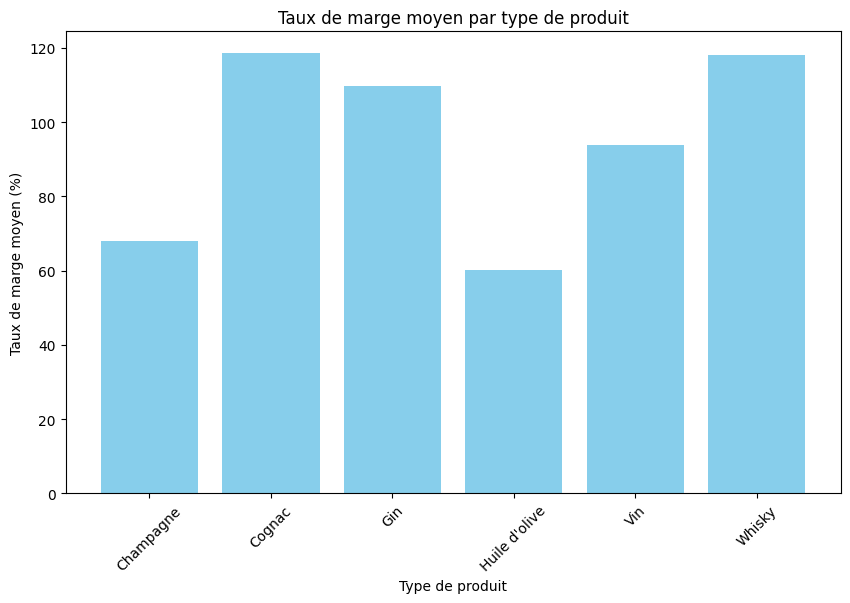

In [62]:
#Création d'un dataframe avec le taux de marge moyen par type de produit
import matplotlib.pyplot as plt
df_final['taux_marge'] = ((df_final['price'] - df_final['purchase_price']) / df_final['purchase_price']) * 100
df_marge_par_type = df_final.groupby('product_type')['taux_marge'].mean().reset_index()
print(df_marge_par_type)
#Affichage dans un graphique du taux de marge par type de produit
plt.figure(figsize=(10, 6))  # Définit la taille du graphique
plt.bar(df_marge_par_type['product_type'], df_marge_par_type['taux_marge'], color='skyblue')
plt.title('Taux de marge moyen par type de produit')
plt.xlabel('Type de produit')
plt.ylabel('Taux de marge moyen (%)')
plt.xticks(rotation=45) # Pivote les étiquettes pour qu'elles soient lisibles
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

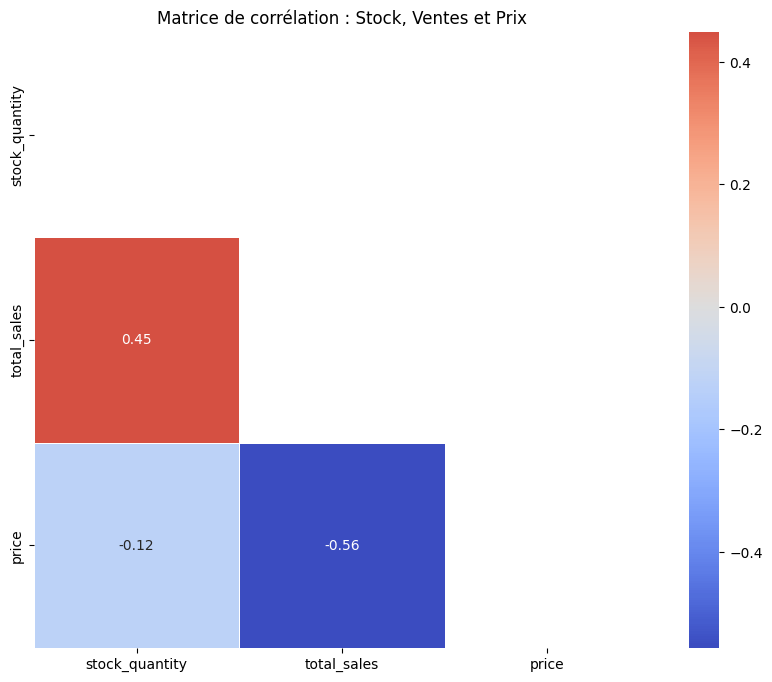

In [63]:
############################
# Analyse des corrélations #
############################

#Importation de Seaborn
import seaborn as sns
#Création d'une heatmap de corrélation avec les variables stock, sales et price
df_corr = df_final[['stock_quantity', 'total_sales', 'price']]
corr_matrix = df_corr.corr()
#On peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5)
plt.title('Matrice de corrélation : Stock, Ventes et Prix')
plt.show()


In [64]:
#Que peut-on conclure des corrélations ?
#Prix vs Ventes : corrélation négative modérée. Plus un produit est cher moins on le vend.
#Ventes vs Sotck : corrélation positive modérée Les produits qui se vendent bien sont stockés en plus grande quantité.
#Prix vs Stock: corrélation très faible : le prix ne détermine pas la quantité en stock.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [65]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.
df_final.to_excel('donnees_consolidees.xlsx', index=False)